In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

# Loading the dataset (numpy files)

In [10]:
## Defining the desired dataset (patch size) 
## Available size: 256, 128, 68
patch_size=256

In [13]:
## Defining the folder and file paths
local_folder='dataset/numpyArrays/' ###Edit this with the folder containing the npy files of the dataset
image_numpyFileName=f'{local_folder}image_dataset_{str(patch_size)}_RGB_DEM_T_Slope_GS.npy'
mask_numpyFileName=f'{local_folder}mask_dataset_{str(patch_size)}.npy'

In [14]:
#loading the multiband images and the correspoding segmentation mask
image_dataset=np.load(image_numpyFileName)
mask_dataset=np.load(mask_numpyFileName)
print(image_dataset.shape)
print(mask_dataset.shape)

(122, 256, 256, 7)
(122, 256, 256, 1)


## Defining a function for visualization of the dataset

In [17]:
## colormap -->
## [0,0,0]: black--Background
## [0,255,0]: green--Debris Flows (DF)
## [255,0,0]: red--Slumps (S)
## [0,0,255]: blue--Rock Avalanches (RA)
    
colormap=[[0,0,0],[0, 255, 0],[255,0,0],[0,0,255]] 
colormap=np.asarray(colormap)
    
def decode_segmentation_masks(mask, colormap, n_classes):
    mask=np.reshape(mask,(mask.shape[0], mask.shape[1]))
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    for l in range(0, n_classes):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    rgb = np.stack([r, g, b], axis=2)
    return rgb

## Visualizing a few random samples from the dataset

Sample:  1


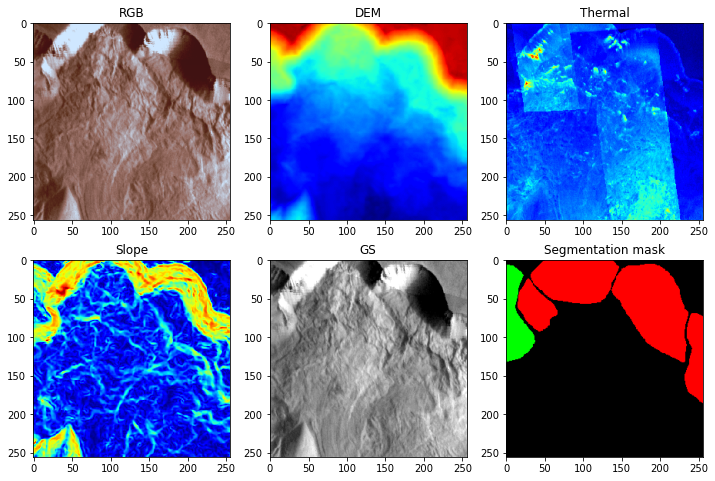

Sample:  2


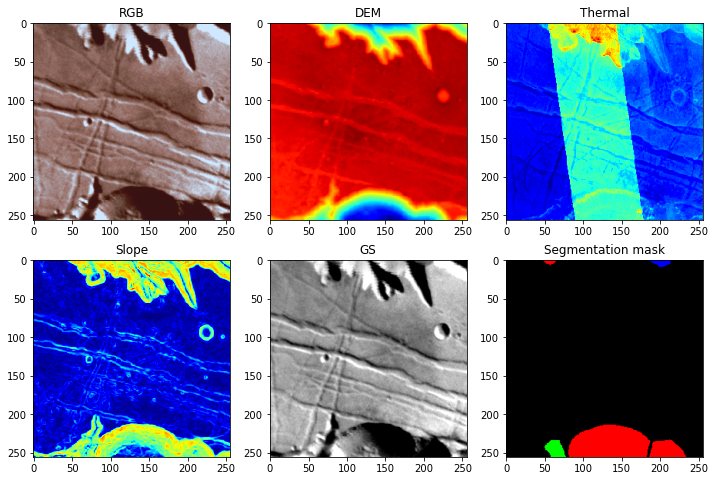

Sample:  3


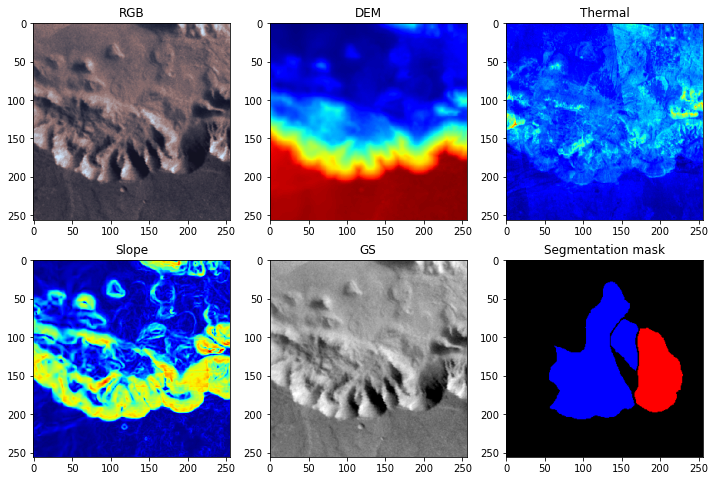

Sample:  4


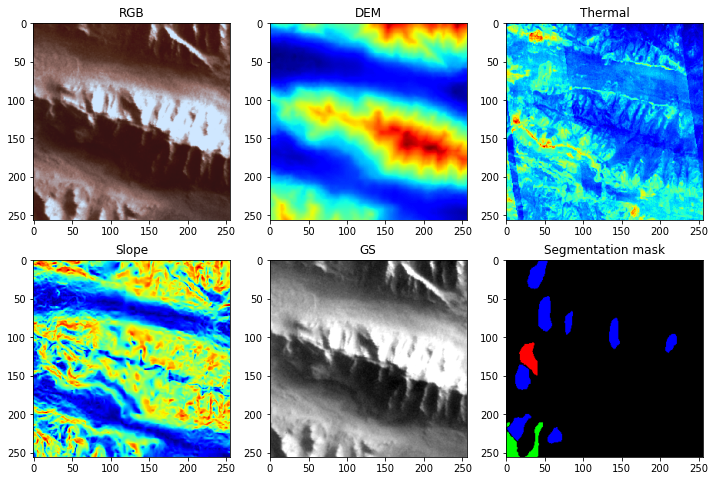

In [23]:
### Visualizing N number of random samples
n=4
number_classes=4
for i in range(n):
    print("Sample: ", i+1)
    image_number = random.randint(0, len(image_dataset)-1)
    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    plt.imshow(cv2.cvtColor(image_dataset[image_number,:,:,0:3], cv2.COLOR_BGR2RGB))
    plt.title("RGB")
    plt.subplot(232)
    plt.imshow(image_dataset[image_number,:,:,3], "jet" )
    plt.title("DEM")
    plt.subplot(233)
    plt.imshow(image_dataset[image_number,:,:,4], "jet")
    plt.title("Thermal")
    plt.subplot(234)
    plt.imshow(image_dataset[image_number,:,:,5], "jet")
    plt.title("Slope")
    plt.subplot(235)
    plt.imshow(image_dataset[image_number,:,:,6],'gray')
    plt.title("GS")## Gray scales
    plt.subplot(236)
    mask_rgb=decode_segmentation_masks(mask_dataset[image_number], colormap, number_classes)
    plt.imshow(mask_rgb)
    plt.title("Segmentation mask")
    plt.show()